https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# Tutorial 1 (housing) Data Exploration and Visualization (Getting to know your data)

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [8]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [7]:
data.head()

NameError: name 'data' is not defined

In [7]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
data.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

All attributes are numerical, except the ocean_proximity field.

In [8]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [9]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

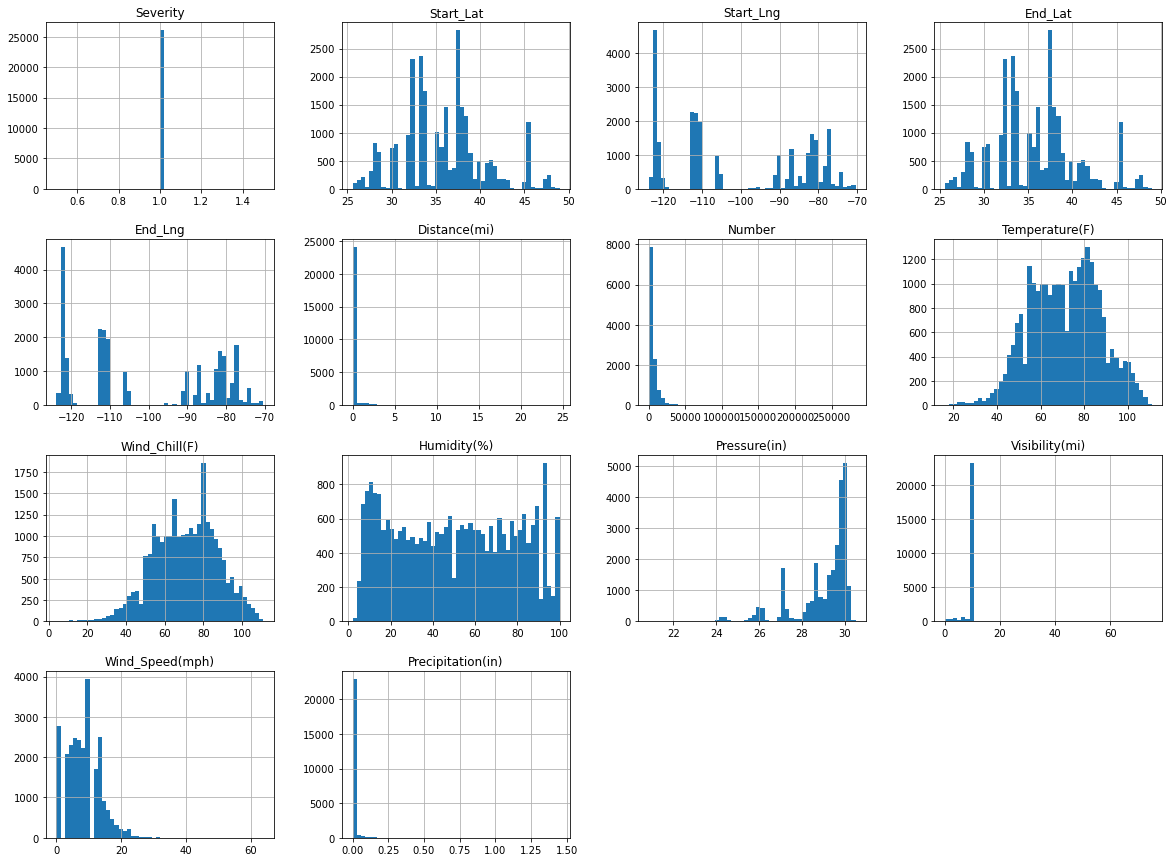

In [71]:
#To plot a histogram for each numerical attribute
testData1.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

In [11]:
cities = data.City.unique()
len(cities)

11682

In [13]:
Weatherconditions = data.Weather_Condition.value_counts().reset_index()
Weatherconditions.columns = ['Weather_Condition','Accidents']
Weatherconditions['Percentage'] = round(Weatherconditions['Accidents'] * 100 /Weatherconditions['Accidents'].sum() , 2)
Weatherconditions.head(10)

,Weather_Condition,Accidents,Percentage
0,Fair,1107194,39.90
1,Mostly Cloudy,363959,13.12
2,Cloudy,348767,12.57
3,Partly Cloudy,249939,9.01
4,Clear,173823,6.26
5,Light Rain,128403,4.63
6,Overcast,84882,3.06
7,Scattered Clouds,45132,1.63
8,Light Snow,43752,1.58
9,Fog,41226,1.49


In [14]:
Severitycounts = data.Severity.value_counts().reset_index()
Severitycounts.columns = ['Severity','Accidents']
Severitycounts['Percentage'] = round(Severitycounts['Accidents'] * 100 /Severitycounts['Accidents'].sum() , 2)
Severitycounts.head()

,Severity,Accidents,Percentage
0,2,2532991,89.02
1,3,155105,5.45
2,4,131193,4.61
3,1,26053,0.92


In [15]:
table = data

In [67]:
testData1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1735388,A-1735389,1,2020-08-03 14:35:16,2020-08-03 15:20:16,32.20676,-110.98050,32.20676,-110.98050,0.0,At I-10/Freeway - Accident.,...,False,False,True,False,True,False,Day,Day,Day,Day
1736991,A-1736992,1,2020-09-22 16:44:38,2020-09-22 17:29:38,32.38084,-110.96392,32.38084,-110.96392,0.0,At N 1st Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1749719,A-1749720,1,2020-08-03 15:42:10,2020-08-03 15:57:10,41.37978,-81.99410,41.37978,-81.99410,0.0,At I-80 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1751859,A-1751860,1,2020-09-22 16:29:33,2020-09-22 17:14:33,33.63950,-112.13436,33.63950,-112.13436,0.0,At N 35th Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1753408,A-1753409,1,2020-08-03 13:41:01,2020-08-03 13:56:01,38.08320,-122.11450,38.08320,-122.11450,0.0,At Lake Herman Rd - Accident. Hard shoulder bl...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355619,A-2355620,1,2020-02-28 16:40:00,2020-02-28 19:00:00,35.72694,-81.56068,35.72694,-81.56068,0.0,At Milestone Avenue - Accident. Hard shoulder ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2355621,A-2355622,1,2020-02-28 17:51:00,2020-02-28 20:51:00,35.37480,-80.70915,35.37480,-80.70915,0.0,At Bruton Smith Blvd - Accident. Two lanes clo...,...,False,False,False,False,False,False,Day,Day,Day,Day
2355622,A-2355623,1,2020-02-28 17:57:00,2020-02-28 19:57:00,35.77494,-78.71344,35.77494,-78.71344,0.0,At Western Blvd - Accident. Left lane closed.,...,False,False,False,False,False,False,Day,Day,Day,Day
2355623,A-2355624,1,2020-02-28 18:24:00,2020-02-28 20:43:58,35.76414,-78.74048,35.76414,-78.74048,0.0,At I -40 - Accident. Right lane closed.,...,False,False,False,False,False,False,Night,Day,Day,Day


# Correlations and Visualizations


In [70]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = testData3.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix["Distance(mi)"].sort_values(ascending=False)

Distance(mi)         1.000000
Number               0.084718
Humidity(%)          0.025667
Pressure(in)         0.014205
Start_Lng            0.011481
End_Lng              0.011386
Junction             0.007723
Precipitation(in)    0.001374
Roundabout          -0.000174
Bump                -0.002713
Stop                -0.003294
Traffic_Calming     -0.003815
End_Lat             -0.003923
Start_Lat           -0.004113
Give_Way            -0.008780
No_Exit             -0.008867
Wind_Speed(mph)     -0.009013
Railway             -0.016915
Visibility(mi)      -0.020212
Temperature(F)      -0.021720
Amenity             -0.022696
Station             -0.038526
Wind_Chill(F)       -0.045762
Crossing            -0.061814
Traffic_Signal      -0.100755
Severity                  NaN
Turning_Loop              NaN
Name: Distance(mi), dtype: float64

<AxesSubplot:>

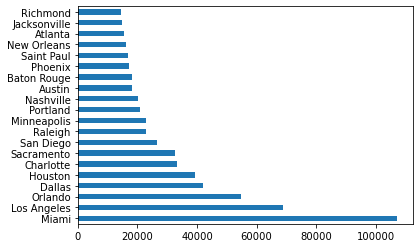

In [17]:
numOfAccidentsPerCity[:20].plot(kind = 'barh')

In [18]:
Weathertypes[:20].plot(kind = 'barh')

NameError: name 'Weathertypes' is not defined

In [ ]:
corr_matrix["Severity"].sort_values(ascending=False)
# Most correlated attributes to Severity

array([[<AxesSubplot:xlabel='Severity', ylabel='Severity'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Severity'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Severity'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Distance(mi)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Distance(mi)'>],
       [<AxesSubplot:xlabel='Severity', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Distance(mi)', ylabel='Wind_Chill(F)'>,
        <AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Wind_Chill(F)'>]],
      dtype=object)

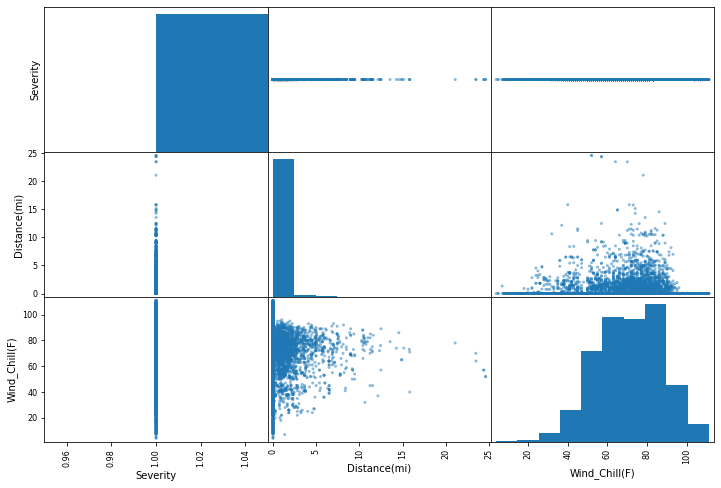

In [75]:
from pandas.plotting import scatter_matrix

attributes = ["Severity","Distance(mi)","Wind_Chill(F)"]
scatter_matrix(testData1[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Humidity(%)", data=data)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Temperature(F)", data=data)
plt.ylabel('Temperature(Farenheit)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=data)
plt.ylabel('Wind_Chill(F)', fontsize=10)
plt.xlabel('Severity', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

# Analyzing most correlating features (Lab3, week4)

In [9]:
#print(data["Severity"][:50])
#2 dataset 1: top features for each class
testData1 = data.copy()
testData2 = data.copy()
testData3 = data.copy()
testData4 = data.copy()


#print("After changing 2 to 99")
#for index, row in testData.iloc[:50].iterrows():
#    if row["Severity"] == 99:
#        #print(row["Severity"])
#        testData.at[index,"Severity"] = 2
#print(testData["Severity"][:50])

#Most correlating features for each label
#label 0, keep 0 as 0 and change all other values to null
print("After changing 2,3,4 to 99")

testData1['Severity'] = testData1['Severity'].replace([2],0)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

testData2['Severity'] = testData2['Severity'].replace([1],0)
testData2['Severity'] = testData2['Severity'].replace([3],0)
testData2['Severity'] = testData2['Severity'].replace([4],0)

testData3['Severity'] = testData3['Severity'].replace([1],0)
testData3['Severity'] = testData3['Severity'].replace([4],0)
testData3['Severity'] = testData3['Severity'].replace([2],0)

testData4['Severity'] = testData4['Severity'].replace([1],0)
testData4['Severity'] = testData4['Severity'].replace([3],0)
testData4['Severity'] = testData4['Severity'].replace([2],0)

#for index, row in testData0.iterrows():
#    if row["Severity"] != 0:
#        #print(row["Severity"])
#        #currValue = row["Severity"]
#        #currIndex = index
#        #testData0.at["Severity"] = 99
#        #print("Changed")
#        #print(currValue)
#        testdata0['Severity'] = test['column name'].replace(['old value'],'new value')
print(testData3["Severity"].value_counts())


After changing 2,3,4 to 99
0    2690237
3     155105
Name: Severity, dtype: int64


In [10]:
#testData1 = testData1.loc[testData1["Severity"] !=99 ]
#testData2 = testData2.loc[testData2["Severity"] !=99 ]
#testData3 = testData3.loc[testData3["Severity"] !=99 ]
#testData4 = testData4.loc[testData4["Severity"] !=99 ]
#print(testData1["Severity"].value_counts())
#print(testData2["Severity"].value_counts())
#print(testData3["Severity"].value_counts())
#print(testData4["Severity"].value_counts())


In [23]:
#print(testData1)
corr_matrix_data1 = testData1.corr()
corr_matrix_data1["Severity"].sort_values(ascending=False)

Severity             1.000000
Traffic_Signal       0.120816
Crossing             0.098200
Wind_Chill(F)        0.055563
Temperature(F)       0.049163
Wind_Speed(mph)      0.017663
Visibility(mi)       0.015361
Railway              0.013699
No_Exit              0.012042
Amenity              0.010831
Station              0.009867
Give_Way             0.006776
Stop                 0.002168
Traffic_Calming      0.001704
Bump                 0.000517
Roundabout           0.000490
Precipitation(in)   -0.001735
Junction            -0.004765
End_Lat             -0.009715
Start_Lat           -0.009717
Number              -0.015495
Start_Lng           -0.021186
End_Lng             -0.021187
Distance(mi)        -0.030796
Pressure(in)        -0.042321
Humidity(%)         -0.060888
Turning_Loop              NaN
Name: Severity, dtype: float64

In [12]:
corr_matrix_data2 = testData2.corr()
corr_matrix_data2["Severity"].sort_values(ascending=False)

Severity             1.000000
Wind_Chill(F)        0.057926
Station              0.013222
Temperature(F)       0.011472
Number               0.009230
Stop                 0.007029
Bump                 0.003507
Traffic_Calming      0.002106
Roundabout           0.000770
Amenity              0.000508
Humidity(%)         -0.000087
No_Exit             -0.003870
Railway             -0.005906
Crossing            -0.010319
Give_Way            -0.010517
Precipitation(in)   -0.016908
Visibility(mi)      -0.020936
Pressure(in)        -0.022967
Traffic_Signal      -0.049457
Distance(mi)        -0.051789
Junction            -0.061190
Wind_Speed(mph)     -0.069599
Start_Lat           -0.082253
End_Lat             -0.082255
Start_Lng           -0.096864
End_Lng             -0.096864
Turning_Loop              NaN
Name: Severity, dtype: float64

In [13]:
corr_matrix_data3 = testData3.corr()
corr_matrix_data3["Severity"].sort_values(ascending=False)

Severity             1.000000
Junction             0.077665
Wind_Speed(mph)      0.067089
Start_Lng            0.052905
End_Lng              0.052904
End_Lat              0.050645
Start_Lat            0.050644
Pressure(in)         0.024320
Visibility(mi)       0.022633
Precipitation(in)    0.021727
Traffic_Signal       0.011123
Give_Way             0.003269
Railway              0.002707
Temperature(F)       0.001644
No_Exit              0.000476
Roundabout          -0.001108
Number              -0.001293
Traffic_Calming     -0.001599
Humidity(%)         -0.002263
Bump                -0.002424
Amenity             -0.006726
Station             -0.010841
Distance(mi)        -0.012905
Stop                -0.016740
Crossing            -0.020573
Wind_Chill(F)       -0.045307
Turning_Loop              NaN
Name: Severity, dtype: float64

In [14]:
corr_matrix_data4 = testData4.corr()
corr_matrix_data4["Severity"].sort_values(ascending=False)

Severity             1.000000
Distance(mi)         0.105154
End_Lng              0.096740
Start_Lng            0.096739
End_Lat              0.072199
Start_Lat            0.072197
Humidity(%)          0.030482
Pressure(in)         0.027250
Wind_Speed(mph)      0.023178
Junction             0.009301
Give_Way             0.009061
Traffic_Signal       0.006809
Stop                 0.006659
Precipitation(in)    0.004258
Amenity              0.001604
Roundabout          -0.000171
No_Exit             -0.000215
Visibility(mi)      -0.000347
Railway             -0.000348
Traffic_Calming     -0.002183
Bump                -0.002838
Number              -0.003758
Crossing            -0.006948
Station             -0.012455
Temperature(F)      -0.041443
Wind_Chill(F)       -0.073010
Turning_Loop              NaN
Name: Severity, dtype: float64

In [33]:
#Seperating the data

#ds1 = top 2 features(top and bottom) of each of the 4 labels: 4x2= 8 attributes total

dataSet1 = pd.DataFrame(testData1, columns=['Severity','Traffic_Signal','Humidity(%)'])
#Do we include serevity?
dataSet1 = pd.concat([dataSet1, pd.DataFrame.from_records(pd.DataFrame(testData2, columns=['Wind_Chill(F)','Wind_Speed(mph)']))])
#dataSet1
#dataSet1 = dataSet1.concat(pd.DataFrame(testData2, columns=['Wind_Chill(F)','Wind_Speed(mph)']))
print(dataSet1)
#Check severity label count ie, how many 1,2,3,4 are there

         Severity Traffic_Signal  Humidity(%)  Wind_Chill(F)  Wind_Speed(mph)
0             0.0          False         58.0            NaN              NaN
1             0.0          False         91.0            NaN              NaN
2             0.0          False         97.0            NaN              NaN
3             0.0          False         55.0            NaN              NaN
4             0.0          False         93.0            NaN              NaN
...           ...            ...          ...            ...              ...
2845337       NaN            NaN          NaN           86.0             13.0
2845338       NaN            NaN          NaN           70.0              6.0
2845339       NaN            NaN          NaN           73.0             10.0
2845340       NaN            NaN          NaN           71.0              8.0
2845341       NaN            NaN          NaN           79.0              7.0

[5690684 rows x 5 columns]


# Experimenting with Attribute Combinations

In [27]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

data["latitude_diff"] = data["End_Lat"]-data["Start_Lat"]

#Calculate total time of accident
data["Total_Time(hrs)"] = pd.to_datetime(data['End_Time'])-pd.to_datetime(data['Start_Time'])
data['Total_Time(hrs)'] = pd.to_timedelta(data['Total_Time(hrs)'])
data['Total_Time(hrs)']=data['Total_Time(hrs)'].dt.total_seconds()/3600  
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,latitude_diff,Total_Time(hrs)
0,A-1,99.0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,Night,Night,Night,Night,0.003150,6.0
1,A-2,99.0,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,Night,Night,Night,Night,-0.000410,6.0
2,A-3,99.0,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,Night,Night,Night,Day,-0.000570,6.0
3,A-4,99.0,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,Night,Night,Day,Day,0.000040,6.0
4,A-5,99.0,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,Day,Day,Day,Day,-0.001917,6.0


In [7]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the housing describe method to view the statistical summary of the dataset 

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [ ]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  
#Q12 What is displayed below? Note your observation 

In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


In [ ]:
median = housing["total_bedrooms"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13


In [ ]:
sample_incomplete_rows

## Scikit-Learn solution (optional)


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
housing_num = housing.drop("ocean_proximity", axis=1) 

In [ ]:
imputer.fit(housing_num)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values #Check that this is the same as manually computing the median of each attribute


In [ ]:
X = imputer.transform(housing_num) # transform the data set

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) # load the new tranformed data set into the pandas frame housing_tr

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

In [ ]:
housing_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


In [ ]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


In [ ]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
type(housing_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

In [ ]:
housing_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

In [ ]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_         # Get a list of categories

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set